# Destination Analysis and Targeted Marketing for Egyptian Tourism

### Project Description:

The aim of this project is to analyze the preferences and interests of tourists visiting various countries and their preferred destinations. By understanding what attracts tourists to specific locations, we can develop targeted marketing strategies to attract them to Egypt. The project will involve comprehensive research, data analysis, and the implementation of effective marketing campaigns to promote Egypt as an appealing tourist destination.

### We collect the attractive places of countries Egypt, Turkey, Thailand from Chatgpt

The collected features following the Chatgpt advice include Location, Country, Historical Significance, Natural Beauty, Adventure Activities, Accessibility, Shopping, Nightlife, Water Sports, Wildlife Viewing, Scuba Diving, and Type.

**Feature Description:**

**Location:** The city location of each place

**Country:** The country name of each place

**Historical Significance:** Relates to the importance of the location in terms of its historical events, heritage, and cultural value. It allows travelers to explore the rich history and traditions of the place.

**Natural Beauty:** Encompasses the scenic landscapes, biodiversity, and natural wonders that the location offers. It appeals to travelers seeking aesthetically pleasing environments and outdoor experiences.

**Adventure Activities:** Includes various thrilling and exciting experiences such as hiking, rock climbing, zip-lining, or any other adrenaline-pumping activities that cater to adventurous travelers.

**Accessibility:** Refers to how easily a location can be reached or explored by different means of transportation. Good accessibility allows for smooth travel and exploration.

**Shopping:** Describes the availability of shopping opportunities in the location, including markets, malls, and unique local products. It attracts travelers interested in purchasing souvenirs or experiencing the local retail scene.

**Nightlife:** Represents the entertainment and social activities that take place during the evening and nighttime. It appeals to travelers looking for vibrant nightlife experiences, such as clubs, bars, or cultural events.

**Water Sports:** Encompasses a variety of activities that take place in water bodies, like swimming, snorkeling, kayaking, or surfing. It attracts travelers who enjoy aquatic adventures.

**Wildlife Viewing:** Focuses on the opportunities to observe and appreciate the local fauna and wildlife in their natural habitats. It appeals to nature enthusiasts and wildlife photographers.

**Scuba Diving:** Specifically refers to the underwater diving activity that involves using self-contained underwater breathing apparatus (scuba). It allows travelers to explore the marine world and its diverse ecosystems.

**Type:** This may refer to the categorization of the destination, such as whether its a beach resort, a historic city, an eco-tourism destination, or an adventure sports hub. It helps travelers choose a location based on their preferred type of travel experience.

___________________________________________________________________________________________________________________________

# The code and its description

Our main source of data is https://tripadvisor.com/. Which is the world's largest travel site. The site includes data about tourist destinations around the world and their reviews.

Using web scraping, we collected all the URLs of these places on Trip Advisor website, and used the URLs to extract the reviews written about these places and its metadata as well as reviewers' data, and we used Levenstein distance technique to ensure that our collected data belongs to our places of interest. 

First we will add Tripadvisor URL column to the Places from Google search

In [1]:
import numpy as np
import pandas as pd
from scrapy.selector import Selector
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import math
import re
from collections import Counter

In [2]:
# ChatGPT places
df = pd.read_csv('places.csv')
df.head()

,Unnamed: 0,Tourist Place,Location,Country,Historical Significance,Natural Beauty,Adventure Activities,Accessibility,Shopping,Nightlife,Water Sports,Wildlife Viewing,Scuba Diving,Type
0,0,Abu Simbel Temples,Aswan,Egypt,High,Low,Low,Medium,No,No,No,No,No,Historical
1,1,Pyramids of Giza,Giza,Egypt,High,Low,Low,High,Yes,Yes,No,No,No,Historical
2,2,Luxor Temple,Luxor,Egypt,High,Low,Low,High,Yes,Yes,No,No,No,Historical
3,3,The Museum of Egyptian Antiquities,Cairo,Egypt,High,Low,Low,High,Yes,Yes,No,No,No,Cultural
4,4,Alexandria,Alexandria,Egypt,Medium,High,Medium,High,Yes,Yes,Yes,No,Yes,Coastal


In [ ]:
df['Tourist Place'] = df['Tourist Place'].map(lambda x: x.strip())
df = df.drop_duplicates(keep='first')

In [ ]:
def get_places_urls(df):
    urls_arr = []
    
    driver = webdriver.Chrome('chromedriver.exe')
    for index, row in df.iterrows():
    
        search_place = row['Tourist Place'].replace(' ', '+')
        search_url = 'https://www.google.com/search?q={0}+{1}+tripadvisor'.format(search_place, row['Country'])
    
        time.sleep(1)
        driver.get(search_url)
        time.sleep(1)
        time.sleep(1)
        body = driver.find_element(By.CSS_SELECTOR, 'body')
    
        sel = Selector(text = driver.page_source)
        attraction_url_on_tripAdvisor = driver.find_element(By.CSS_SELECTOR, 'div.yuRUbf a')
        final_url = attraction_url_on_tripAdvisor.get_attribute('href')
        urls_arr.append(final_url)
        
    return urls_arr

In [ ]:
urls = get_places_urls(df)
df['Url'] = urls
df.to_csv('Places_with_urls.csv', index = True)

In [ ]:
df = pd.read_csv('Places_with_urls.csv')
df.head()

In [ ]:
places_urls_df = pd.read_csv('Places_with_urls.csv')
places_urls_df = places_urls_df.drop(['Unnamed: 0'], axis=1)
df_subset = places_urls_df.iloc[0:217]
df_subset.head(15)

### Presently, we'll gather the reviews from tourists for each Attractive place, but we'll restrict the number of collected reviews to 2000 to optimize time usage.

We will use Levenstein distance technique to ensure that our collected data belongs to our places of interest (as may the URL is getting data for other place)

In [ ]:
!pip install textdistance

In [ ]:
from textdistance import levenshtein

In [ ]:
WORD = re.compile(r"\w+")

def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

Hint, no need to run the next code as it takes days to collect the data from trip advisor, the final exported data is attached with name (All_reviews.csv)

In [ ]:

driver = webdriver.Chrome('chromedriver.exe')
Tourist_Reviews = pd.DataFrame(list())
    
for index, row in df_subset.iterrows():
    rating_list = []
    review_date_list = []
    review_title_list = []
    author_list = []
    review_text_list = []
    review_country = []
    review_contributions = []
    visited_places = []
    number_of_reviews = []
    
    places_no_reviews = []
    urls_no_reviews = []
    
    names_in_excel = []
    levenshtein_Distances = []
    cosine_similarities = []

    error_url_list = []
    error_msg_list = []
    try:
        driver.get(row['Url'])
        print(index, row['Url'])
    except:
        pass 
        
    time.sleep(1)
    print(driver.title)
    time.sleep(1)
    body = driver.find_element(By.CSS_SELECTOR, 'body')
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(1)
    body.send_keys(Keys.PAGE_DOWN)
    
    sel = Selector(text = driver.page_source)
    
    try:
        visited_place = driver.find_element(By.CSS_SELECTOR, 'div.iSVKr h1.biGQs._P.fiohW.eIegw').text
        lev = levenshtein.distance(visited_place, row['Tourist Place'])
    
        vector1 = text_to_vector(visited_place)
        vector2 = text_to_vector(row['Tourist Place'])
        cosine = get_cosine(vector1, vector2)
    except:
        visited_place = np.NaN
    
    try:
        review_counts = sel.css('span.KAVFZ').extract_first().split('>')[1].split('<')[0].split(' ')[0].replace(',', '')
        print(review_counts)
        more_review_pages = int(int(review_counts)/10)
        more_review_pages
    except:
        review_counts = np.NaN
        places_no_reviews.append(row['Tourist Place'])
        urls_no_reviews.append(row['Url'])
        continue
    
    for i in range(200):
        
        try:
            reviews = driver.find_elements(By.CSS_SELECTOR, 'div.LbPSX div.C div._c')
            
            for d in reviews:
                try:
                    
                    sel = Selector(text = d.get_attribute('innerHTML'))
                    try:
                        rating_element = sel.css('div svg.UctUV.d.H0').extract_first().strip().split(' ')[10].split('"')[1]
                        rating = int(float(rating_element))
                    except:
                        rating = np.NaN
                    try:
                        contributions = sel.css('.JINyA .biGQs._P.pZUbB.osNWb span').extract()[1].replace(',', '').split('>')[1].split('<')[0].split(' ')[0]
                        contributions = int(float(contributions))
                        country = sel.css('.JINyA .biGQs._P.pZUbB.osNWb span').extract()[0].split('>')[1].split('<')[0]
                    except:
                        try:
                            contributions = sel.css('.JINyA .biGQs._P.pZUbB.osNWb span').extract()[0].replace(',', '').split('>')[1].split('<')[0].split(' ')[0]
                            contributions = int(float(contributions))
                            country = np.NaN
                        except:
                            contributions = np.NaN
                            country = np.NaN
                            
                    try:
                        review_date = sel.css('div.RpeCd::text').extract_first()
                    except:
                        review_date = np.NaN    
                    try:
                        author = sel.css('.biGQs._P.fiohW.fOtGX a::text').extract_first()
#                         visited_place = driver.find_element(By.CSS_SELECTOR, 'div.iSVKr h1.biGQs._P.fiohW.eIegw').text
                    except:
                        author = np.NaN
#                         visited_place = np.NaN
                    try:
                        review_title = sel.css('span.yCeTE::text').extract_first()
                    except:
                        review_title = np.NaN
                    try:
                        review_text = sel.css('.biGQs._P.pZUbB.KxBGd .yCeTE::text').extract_first()
                    except:
                        review_text = np.NaN    
                    try:
                        num_reviews = driver.find_element(By.CSS_SELECTOR, 'div.Ci').text.split('results ')[1]
                    except:
                        num_reviews = np.NaN    
                    
                    visited_places.append(visited_place)
                    names_in_excel.append(row['Tourist Place'])
                    levenshtein_Distances.append(lev)
    
#                     vector1 = text_to_vector(visited_place)
#                     vector2 = text_to_vector(row['Tourist Place'])
#                     cosine = get_cosine(vector1, vector2)
                    
                    cosine_similarities.append(cosine)
                    
                    rating_list.append(rating)
                    review_country.append(country)
                    review_contributions.append(contributions)

                    review_date_list.append(review_date)
                    review_title_list.append(review_title)

                    author_list.append(author)
                    number_of_reviews.append(num_reviews)
                    review_text_list.append(review_text)
                    
                except:
                    print('err0')
                    
                    
            try:
                element = driver.find_element(By.CSS_SELECTOR, '.xkSty .UCacc a')
                new_url = element.get_attribute('href')
                print(new_url, 'next_url')

                time.sleep(1)
                driver.get(new_url)
                
                time.sleep(2)
                sel = Selector(text = driver.page_source)
                
            except:
                break
                
        except:
            break

    
    review_df = pd.DataFrame({
        'Review_Date':review_date_list,
        'Author':author_list,
        'Rating':rating_list,
        'Review_Title':review_title_list,
        'Review':review_text_list,
        'Country': review_country,
        'Contributions': review_contributions,
        'Name on TripAdvisor': visited_places,
        'Name in xlsx': names_in_excel,
        'Number of reviews': number_of_reviews,
        'Levenshtein Distance': levenshtein_Distances,
        'Cosine Similarity': cosine_similarities
        })
    review_df.dropna(axis = 0, how = 'all', inplace = True) # remove the total empty row 
    try:
        review_df['Traveler status'] = review_df['Review_Date'].map(lambda x: x.split('•')[1] if x is not None else np.nan)
        review_df['Review_Date'] = review_df['Review_Date'].map(lambda x: x.split('•')[0] if x is not None else np.nan)
    except:
        review_df['Review_Date'] = review_df['Review_Date'].map(lambda x: x.split('•')[0] if x is not None else np.nan)
        review_df['Traveler status'] = np.NaN
    
    #review_df.to_csv('Places_reviews.csv', index = True)
    review_df.to_csv("All_reviews.csv", index=False, mode='a', header=False)


####Saving places with no reviews
no_review_df = pd.DataFrame({
    'Place name in sheet': places_no_reviews,
    'Url': urls_no_reviews
})
#     no_review_df.dropna(axis = 0, how = 'all', inplace = True)
no_review_df.to_csv("No_reviews.csv", index=False, mode='a', header=False)
    
driver.quit()


#### Here we have two output files. The first file contains all the successfully exported reviews, while the second file includes information about places with incorrect URLs or zero reviews. For the locations in the "No review" file, we manually collected their URLs and then repeated the previous steps to obtain their reviews and added them to the "All reviews" sheet.

#### Then we checked the places that have Levenishtien value < 0.5 and ensure that the places from trip advisor are consistent with our places name, and if they are not consistent, we get the URL manually and repeat the previous steps

_________________________________________________________________________________________________________________________________

### Clustring the Attractive places

We set out with the objective of grouping the list of locations by utilizing the categories gathered during the initial phase. Our goal was to generate distinct clusters, each consisting of comparable places. We experimented with creating 4, 5, 6, and 7 clusters. We used KMeans algorithm to cluster the data

In [3]:
import pandas as pd
#from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
df = pd.read_csv('Places_with_urls.csv')

for column in ['Shopping', 'Nightlife', 'WaterSports', 'WildlifeViewing', 'NaturalBeauty']:
    df[column] = df[column].map({'Yes': 1, 'High': 1, 'No': 0, 'Low': 0})

for column in ['HistoricalSignificance', 'AdventureActivities', 'Accessibility']:
    df[column] = df[column].map({'High': 3, 'Medium': 2, 'Low': 1})
#le = LabelEncoder()
#df['Cuisine'] = le.fit_transform(df['Cuisine'])

#one hot coding for type
df = pd.get_dummies(df, columns=['Type'])
X = df.drop(['Unnamed: 0', 'Tourist Place', 'Location', 'Country','ScubaDiving','Url'], axis=1)
null_counts = df.isnull().sum()
print(null_counts)

Unnamed: 0                                0
Tourist Place                             0
Location                                  0
Country                                   0
HistoricalSignificance                    0
NaturalBeauty                             0
AdventureActivities                       0
Accessibility                             0
Shopping                                  0
Nightlife                                 0
WaterSports                               0
WildlifeViewing                           0
ScubaDiving                               0
Url                                       0
Type_Coastal                              0
Type_Commercial                           0
Type_Cultural                             0
Type_Entertainment                        0
Type_Historical                           0
Type_Natural Parks and Protected Areas    0
dtype: int64


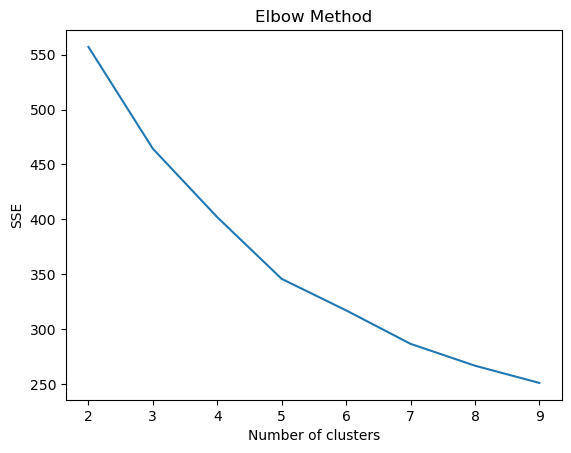

Silhouette score for k=2: 0.3197401882257881
Silhouette score for k=3: 0.2563814976703912
Silhouette score for k=4: 0.27775321651688833
Silhouette score for k=5: 0.298341387444546
Silhouette score for k=6: 0.3213010496381913
Silhouette score for k=7: 0.3218767204461577
Silhouette score for k=8: 0.33735087941141795
Silhouette score for k=9: 0.33736711153877613
4
5
6
7


In [4]:
sse = []
silhouette_scores = []
k_values = range(2, 10)

for i in k_values:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
plt.plot(k_values, sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
# Print the silhouette scores for different k values
for k, score in zip(k_values, silhouette_scores):
    print(f"Silhouette score for k={k}: {score}")


optimal_clusters = range(4,8)
for j in optimal_clusters:
    print(j)
    kmeans = KMeans(n_clusters=j, random_state=0)
    df['Cluster'] = kmeans.fit_predict(X)
    filename = f"trial_{j}_clusters.csv"
    df.to_csv(filename, index=False)

#### Plot the categoriese for each cluster (4,5,6,7)

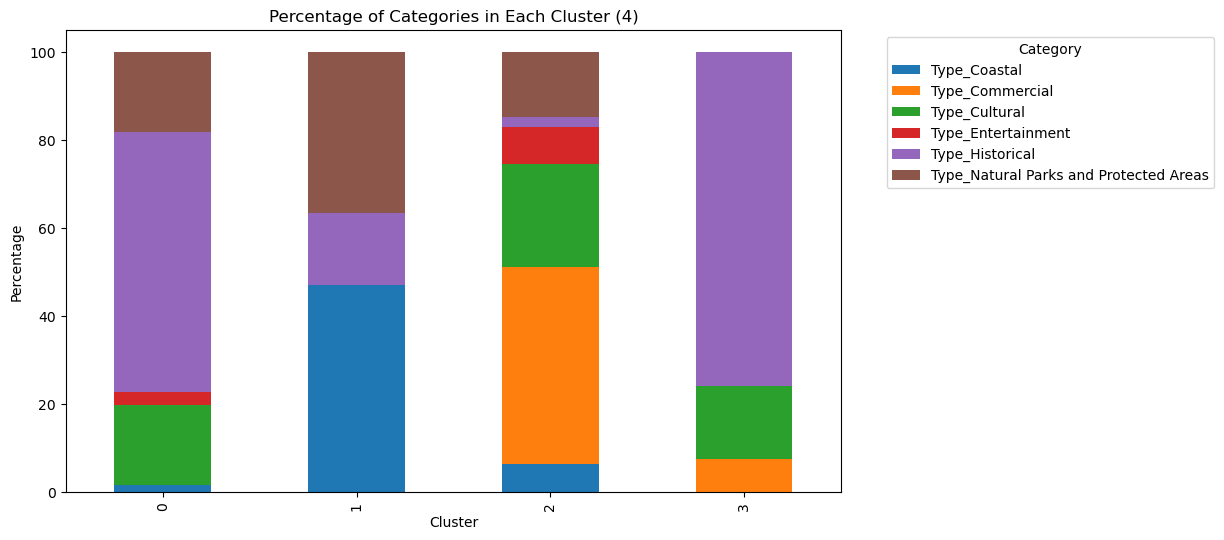

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

selected_columns = ['Type_Coastal','Type_Commercial','Type_Cultural','Type_Entertainment',\
                    'Type_Historical','Type_Natural Parks and Protected Areas','Cluster']

df = pd.read_csv('trial_4_clusters.csv', usecols=selected_columns)
df.head()
# Group data by Cluster and calculate the percentage of each category
grouped_df = df.groupby('Cluster').mean() * 100

# Create a stacked bar plot for each cluster
grouped_df.plot.bar(stacked=True, figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Percentage of Categories in Each Cluster (4)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

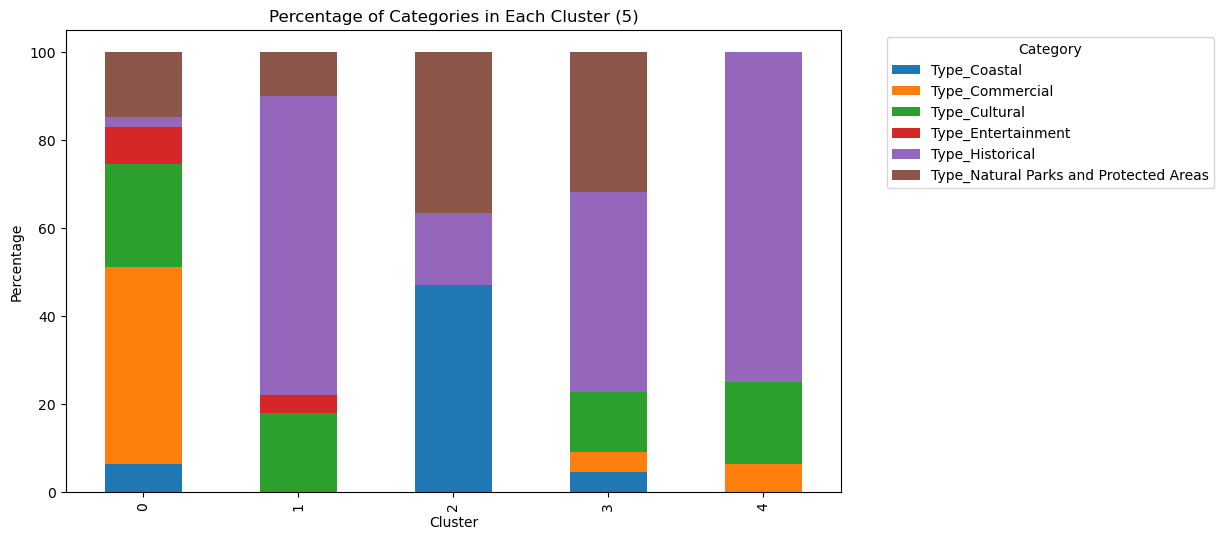

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

selected_columns = ['Type_Coastal','Type_Commercial','Type_Cultural','Type_Entertainment',\
                    'Type_Historical','Type_Natural Parks and Protected Areas','Cluster']

df = pd.read_csv('trial_5_clusters.csv', usecols=selected_columns)
df.head()
# Group data by Cluster and calculate the percentage of each category
grouped_df = df.groupby('Cluster').mean() * 100

# Create a stacked bar plot for each cluster
grouped_df.plot.bar(stacked=True, figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Percentage of Categories in Each Cluster (5)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

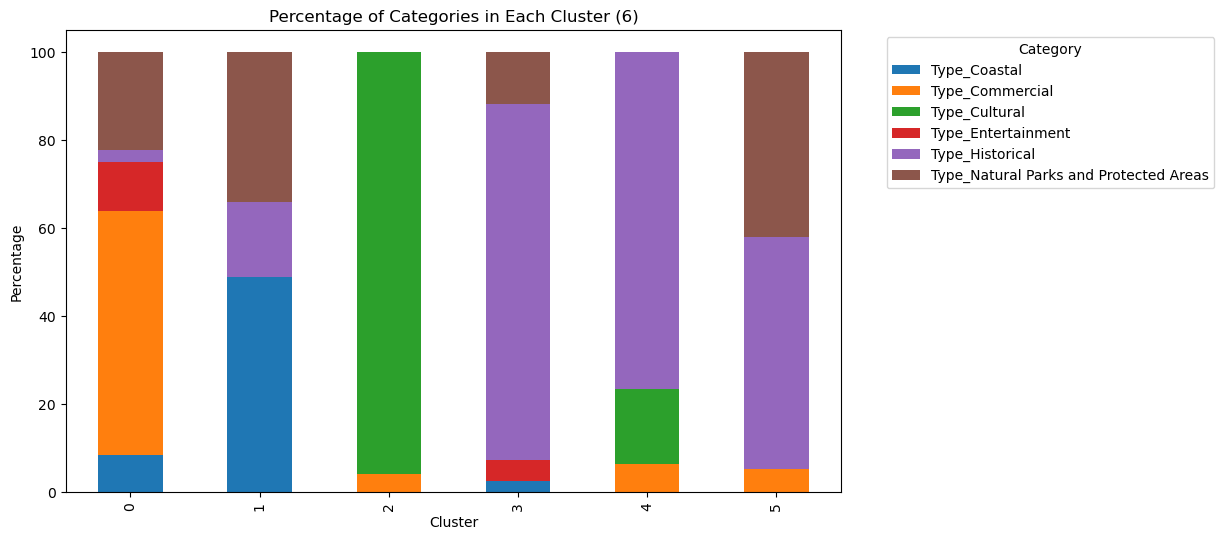

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

selected_columns = ['Type_Coastal','Type_Commercial','Type_Cultural','Type_Entertainment',\
                    'Type_Historical','Type_Natural Parks and Protected Areas','Cluster']

df = pd.read_csv('trial_6_clusters.csv', usecols=selected_columns)
df.head()
# Group data by Cluster and calculate the percentage of each category
grouped_df = df.groupby('Cluster').mean() * 100

# Create a stacked bar plot for each cluster
grouped_df.plot.bar(stacked=True, figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Percentage of Categories in Each Cluster (6)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

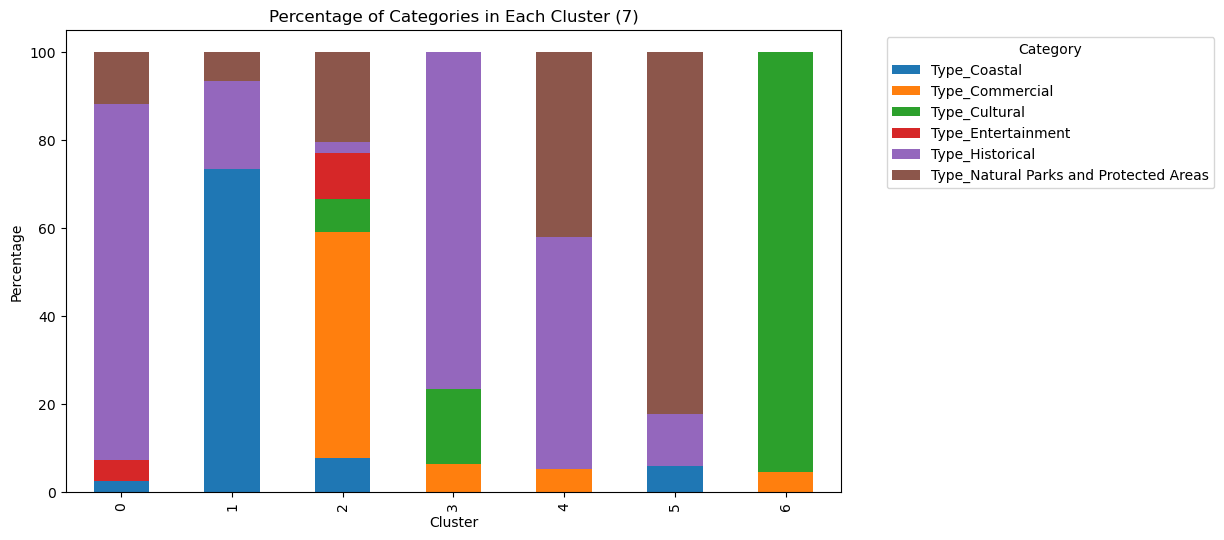

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

selected_columns = ['Type_Coastal','Type_Commercial','Type_Cultural','Type_Entertainment',\
                    'Type_Historical','Type_Natural Parks and Protected Areas','Cluster']

df = pd.read_csv('trial_7_clusters.csv', usecols=selected_columns)
df.head()
# Group data by Cluster and calculate the percentage of each category
grouped_df = df.groupby('Cluster').mean() * 100

# Create a stacked bar plot for each cluster
grouped_df.plot.bar(stacked=True, figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Percentage')
plt.title('Percentage of Categories in Each Cluster (7)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Following the comprehensive analysis, which also considered the Elbow method and silhouette, we have concluded that the optimal number of clusters for our study is 6-cluster.

_______________________________________________________________________________________________________________________________

## Adding new features to all reviews sheet

### 1- Adding feature "sentiment analysis"

In [1]:
import pandas as pd
import numpy as np

In [2]:
# We have 2 reviews sheet (Reviews.csv & All_reviews_for_Thailand.csv), we will concatenate both sheets
reviews = pd.read_csv('Reviews.csv')

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
reviews.head()

,Date,Reviewer,Stars,title,review text,Country,contributions,trip advisor name,Tourist place,review,Unnamed: 10,Levenishtien,Unnamed: 12
0,23-May,mtca78,5,Amazing!!!!!!,Amazing place; one of the most impressive temples Iâ€™ve ever seen. I recommend going early in the morning to avoid the hot weather.,"Mexico City, Mexico",7.0,Abu Simbel Temple Complex,Abu Simbel Temples,"1-10 of 1,890",8,0.57735,NaN
1,23-May,Olga,5,Amazing temples,"One of our favourite places in Egypt. The temples are amazing. We came here at around 9.30 am and it was crowded with big tourist groups. By about 10.30 am we had the whole place to ourselves. We would recommend flying here from Aswan rather than doing the 3.5 hour drive each way. You can also stay here to explore the other Nubian temples close by (we didn't have time to do this on this trip). You can catch a taxi to the site from the airport. It gets very hot and there is a small shop which sells water and snacks. If you are a history buff like us, you could easily stay here for hours (like we did). If not, 1 hour is probably sufficient.","Copenhagen, Denmark",89.0,Abu Simbel Temple Complex,Abu Simbel Temples,"1-10 of 1,890",8,0.57735,NaN
2,23-Apr,Barbara B,5,Unbelievable Abu Simbel,"OH MY! I have seen pictures of this site for decades, but nothing compared to seeing those massive statues in real life. I was speechless, literally. This site has now become my favorite. If you can visit it- do so!!",Naperville,60.0,Abu Simbel Temple Complex,Abu Simbel Temples,"1-10 of 1,890",8,0.57735,NaN
3,23-May,Danielle R,5,Holy Carp! This place is awesome.,I knew this site was stunning from pictures and documentaries but those don't even come close to how awesome this place is. Astounding. It's mind-boggling to think of it being built and even more mind-boggling that it was moved to the current location in the 1960s.,"Toledo, OH",11.0,Abu Simbel Temple Complex,Abu Simbel Temples,"1-10 of 1,890",8,0.57735,NaN
4,23-May,AliAsad1110,5,Amazing Abu Simbel,Abu Simbel is a historic site comprising two massive rock-cut temples in the village of Abu Simbel. This place does not disappoint. The scaleI is beyond words. It fantastic. Itâ€™s emotionally moving. It was moved and reconstructed in the early sixties to save it from the waters of lake Nassar.,"Rattlesden, UK",255.0,Abu Simbel Temple Complex,Abu Simbel Temples,"1-10 of 1,890",8,0.57735,NaN


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98502 entries, 0 to 98501
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               96736 non-null  object 
 1   Reviewer           98438 non-null  object 
 2   Stars              98502 non-null  int64  
 3   title              98491 non-null  object 
 4   review text        98468 non-null  object 
 5   Country            86544 non-null  object 
 6   contributions      98482 non-null  float64
 7   trip advisor name  98502 non-null  object 
 8   Tourist place      98502 non-null  object 
 9   review             98461 non-null  object 
 10  Unnamed: 10        98502 non-null  int64  
 11  Levenishtien       98502 non-null  float64
 12  Unnamed: 12        42 non-null     object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.8+ MB


In [6]:
reviews_thailand = pd.read_csv('All_reviews_for_Thailand.csv', names=reviews.columns)

In [7]:
reviews_thailand.head()

,Date,Reviewer,Stars,title,review text,Country,contributions,trip advisor name,Tourist place,review,Unnamed: 10,Levenishtien,Unnamed: 12
0,Jul-23,Joolsmcc,5,"Feast for the eyes, amazing!",We visited as part of a half day tour and the experience was incredible. So many beautiful and historic pieces to look at. Loved it.,"Doha, Qatar",30.0,The Grand Palace,Grand Palace,"1-10 of 21,933",4,0.816497,NaN
1,Jul-23,James W,5,Incredible palace,The giant gold buddha at the palace is really incredible. Cheap entry and great to look around the grounds.,"Bangkok, Thailand",5.0,The Grand Palace,Grand Palace,"1-10 of 21,933",4,0.816497,NaN
2,Jun-23,Kate,5,Exquisite. Stunning.,"This palace has exquisite details inside and out. Extraordinarily beautiful. Photos do not do it justice; must see in person. And of course, the emerald Buddha was a delight to see, as well. This a MUST if you are visiting Bangkok.","Washington DC, DC",166.0,The Grand Palace,Grand Palace,"1-10 of 21,933",4,0.816497,NaN
3,Jun-23,Marbo B,5,A Majestic Journey into Thai History and Culture,"Located in the heart of Bangkok, the Grand Palace is a stunning complex that showcases the grandeur and opulence of Thai royalty. From the intricate details of the buildings to the captivating stories behind each structure, every corner of the palace is a testament to the country's cultural heritage.visual spectacle that was truly awe-inspiring.",NaN,3.0,The Grand Palace,Grand Palace,"1-10 of 21,933",4,0.816497,NaN
4,Jun-23,Harrigan's Travels,4,Get in early and ensure you are dressed properly,"Get in early, as close to opening time as you can, to avoid crowds. Ensure you are familiar with the dress requirements and familiarise yourself with what you can and cannot take into the Grand Palace.","Sydney, Australia",72.0,The Grand Palace,Grand Palace,"1-10 of 21,933",4,0.816497,NaN


In [8]:
reviews = pd.concat([reviews, reviews_thailand], axis=0)

In [ ]:
reviews.reset_index(inplace=True, drop=True)

In [ ]:
reviews.drop(['review', 'Unnamed: 10', 'Levenishtien', 'Unnamed: 12'], axis=1, inplace=True)

In [ ]:
reviews.dropna(subset=['Country', 'review text', 'Date'], axis=0, inplace=True)

In [ ]:
reviews['title'] = reviews['title'].fillna('')

In [ ]:
reviews.info()

In [ ]:
reviews['Title+Review'] = reviews['title'] + ' ' + reviews['review text']

In [ ]:
reviews.drop(['title', 'review text'], axis=1, inplace=True)

In [ ]:
reviews.head()

In [ ]:
!pip install inflect
import inflect
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from nltk.corpus import wordnet as wn
nltk.download('punkt')

In [ ]:
p = inflect.engine()
def convert_number(text):
    temp_str = text.split()
    new_string = []
 
    for word in temp_str:
        if word.isdigit():
            temp = p.number_to_words(word)
            new_string.append(temp)
        else:
            new_string.append(word)
 
    temp_str = ' '.join(new_string)
    return temp_str

In [ ]:
nltk.download('stopwords')
english_stops = stopwords.words('english')
#add punctuation to stopwords
english_stops += list(string.punctuation)

In [ ]:
nltk.download('wordnet')

In [ ]:
def text_processing(row):
    row['Title+Review'] = row['Title+Review'].lower()               ### convert text to lower case
    row['Title+Review'] = re.sub(r"\s+[a-zA-Z]\s+", " ", row['Title+Review'])   
    clean = re.compile('<.*?>')
    row['Title+Review'] = re.sub(clean, '', row['Title+Review'])
    row['Title+Review'] = re.sub(r"\s+"," ", row['Title+Review'], flags = re.I)
    row['Title+Review'] = re.sub(r'^https?:\/\/.*[\r\n]*', '', row['Title+Review'], flags=re.MULTILINE)
    row['Title+Review'] = re.sub(r"\W", " ", row['Title+Review'], flags=re.I)  ### remove all non-word characters
    row['Title+Review'] = convert_number(row['Title+Review'])       ### convert number to text
  
    review_words = word_tokenize(row['Title+Review'])        ### get words from text
    review_words_no_stop = [item for item in review_words if item not in english_stops] ### removes stopwords & punctuation
    wordnet_lemmatizer = WordNetLemmatizer()
    words_lemmatization = [wordnet_lemmatizer.lemmatize(item) for item in review_words_no_stop] ### lemmatize words
    words_in_english = [item for item in words_lemmatization if len(wn.synsets(item)) != 0]
    
    unique_words = list(set(words_in_english))      ### removes duplicated words
    
    row['Title+Review'] = " ".join(unique_words)             ### Concatenate all words
    return row['Title+Review']

In [ ]:
reviews['Title+Review'] = reviews.apply(lambda row: text_processing(row), axis=1)

In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
vader = SentimentIntensityAnalyzer()

In [ ]:
reviews['Scores'] = reviews['Title+Review'].apply(lambda review: vader.polarity_scores(review))
reviews.head()

In [ ]:
reviews['compound'] = reviews['Scores'].apply(lambda x: x['compound'])

In [ ]:
def polarity_score(compound):
    if compound > 0.05:
        return "positive"
    elif compound < -0.05:
        return "negative"
    elif compound >= -0.05 and compound <= 0.05:
        return "neutral"

In [ ]:
reviews['sentiment'] = reviews['compound'].apply(lambda val: polarity_score(val))

In [ ]:
reviews.drop(['Scores', 'compound'], axis=1, inplace=True)

In [ ]:
reviews.to_csv('Reviews_processed.csv')

### 2- Adding feature "Country" column (e.g repeated country name: England, UK, United of kingdon, London,...)

In [ ]:
# 1- export country column by selecting the unique values of the mentioned home countries in reviews
import pandas as pd

def extract_unique_values(input_file, column_name, output_file):
    # Read the CSV file into a dataframe
    df = pd.read_csv(input_file)
    
    # Get the unique values from the specified column
    unique_values = df[column_name].unique()
    
    # Create a new dataframe with the unique values and a single column
    unique_df = pd.DataFrame({column_name: unique_values})
    
    # Save the unique values to a new CSV file
    unique_df.to_csv(output_file, index=False)

# Replace these file paths with your actual file paths
input_file_path = "Reviews_processed.csv"
output_file_path = "output_file.csv"
column_name = "Country"

# Call the function to extract unique values and save them to a new CSV file
extract_unique_values(input_file_path, column_name, output_file_path)

In [ ]:
# 2- cleaning the countries column by removing numerical places that has no string 
import pandas as pd
import re

def remove_numbers(input_string):
    return re.sub(r'^\d+$', '', input_string)

# Example usage

df = pd.read_csv("output_file.csv")

    # Apply the remove_numerical_values function to the 'Your_Column' column
df['Country'] = df['Country'].apply(remove_numbers)
df = df.replace(r'^s*$', float('NaN'), regex = True).dropna()

df.to_csv("output_file2.csv", index=False)



In [ ]:
# 3- exporting the new country column using the below library

geolocator = Nominatim(user_agent="location_converter (en)")

# Function to geocode the location and get the country name
def geocode_location(location):
    try:
        location_info = geolocator.geocode(location, language='en', timeout=5)
        if location_info:
            return location_info.raw["display_name"].split(",")[-1].strip()
        else:
            return None
    except Exception:
        return None

# Set up rate limiters for geocoding services
geocode_nominatim = RateLimiter(geocode_location, min_delay_seconds=1)

# Function to convert and append the geocoded country name for every row
def convert_and_append(location):
    #print(geocode_nominatim(location))
    return geocode_nominatim(location)

# Use ThreadPoolExecutor to apply the geocoding function in parallel
with ThreadPoolExecutor() as executor:
    df['countries'] = list(executor.map(convert_and_append, df[column_name]))

# Save the modified DataFrame to a new Excel file with all rows in one sheet
with pd.ExcelWriter(excel_file.replace('.csv', '_geocoded.xlsx'), engine='openpyxl') as writer:
    df.to_excel(writer, index=False)

print("Geocoded data saved to the Excel file.")
end_time = time.time()

# Calculate and print the data import time
data_import_time = end_time - start_time
print(f"Data import time: {data_import_time} seconds.")

In [ ]:
# 4- Maping between the unique countries and the main review sheet

import pandas as pd

# Load the data from the Excel files into DataFrames
df1 = pd.read_excel('output_file_geocoded_final.xlsx', sheet_name='Sheet1')
df2 = pd.read_csv('All_reviews.csv')

# Perform the VLOOKUP using merge() method
result_df = pd.merge(df2, df1[['Country', 'countries']], left_on='Country', right_on='Country', how='left')

# Rename the result column to the desired name (Column2 is the result of the VLOOKUP)
result_df.rename(columns={'countries': 'VLOOKUP_Result'}, inplace=True)

# Print the result DataFrame
print(result_df)
result_df.to_csv("Reviews_processed_V2.csv", index=False)

### 3- Adding new Feature "Season" column

In [ ]:
import pandas as pd

import time


# Specify the path to your Excel file
df = pd.read_csv('Reviews_processed_V2.csv')

# Convert the valid dates to datetime format and keep the original data for invalid dates
converted_dates = pd.to_datetime(df['Date'], format='%d-%b', errors='coerce')

# Combine the converted dates and the original data using fillna()
df['Date'] = converted_dates.dt.strftime('%d-%b').fillna(df['Date'])
print(df)

# Create a mapping of months to their corresponding seasons
month_to_season = {
    'Dec': 'Winter',
    'Jan': 'Winter',
    'Feb': 'Winter',
    'Mar': 'Spring',
    'Apr': 'Spring',
    'May': 'Spring',
    'Jun': 'Summer',
    'Jul': 'Summer',
    'Aug': 'Summer',
    'Sep': 'Autumn',
    'Oct': 'Autumn',
    'Nov': 'Autumn',
}

# Create a function to get the season based on the month
def get_season(month):
    if month is pd.NaT:  # Handle NaT (invalid dates)
        return ''
    return month_to_season[month.strftime('%b')]

# Apply the function to the "date_column_name" to create a new column "Season"
df['Season'] = converted_dates.apply(get_season)

# Now, the "Season" column contains the corresponding season for each month
print(df)
df.to_csv("Reviews_processed_V3.csv", index=False)

### 4- Adding feature "Cluster" column

In [ ]:
import pandas as pd

# Load the data from the Excel files into DataFrames
df1 = pd.read_csv('trial_6_clusters.csv')
df2 = pd.read_csv('Reviews_processed_V3.csv')

# Perform the VLOOKUP using merge() method
result_df = pd.merge(df2, df1[['Tourist Place', 'Cluster']], left_on='Tourist place', right_on='Tourist Place', how='left')

# Drop the unnecessary columns (Tourist Place is duplicated, and Tourist place is the original column)
result_df.drop(columns=['Tourist Place'], inplace=True)

# Print the result DataFrame
print(result_df)
result_df.to_csv("Reviews_processed_V4.csv", index=False)

_________________________________________________________________________________________________________________________________

# Analysis:

### 1- Visualizing Stars vs reviews sentiment

In [24]:
import pandas as pd

df = pd.read_csv('Reviews_processed_V4.csv')

Calculating the % of positive reviews per place

In [25]:
sent1=df[['Tourist place', 'sentiment']]
sent1.head()

,Tourist place,sentiment
0,Abu Simbel Temples,positive
1,Abu Simbel Temples,positive
2,Abu Simbel Temples,positive
3,Abu Simbel Temples,positive
4,Abu Simbel Temples,positive


In [26]:
sent2=pd.pivot_table(sent1,index='Tourist place',columns='sentiment',aggfunc=len, fill_value=0)
sent2.head()

sentiment,negative,neutral,positive
Tourist place,,,
Abu Mena,2,0,1
Abu Rawash,1,0,0
Abu Simbel Sound and Light Show,10,2,108
Abu Simbel Temples,76,64,1583
Abydos Temple,6,5,96


In [27]:
sent2['total']=sent2[['negative','neutral','positive']].sum(axis=1)
sent2['positive%']=round(sent2['positive']*100/sent2['total'],2)
sent2.sort_values(by='positive%', ascending=False, inplace=True)
sent2.head()

sentiment,negative,neutral,positive,total,positive%
Tourist place,,,,,
Qasr el-Nil Bridge,0,0,3,3,100.00
Egyptian Textile Museum,0,0,13,13,100.00
Ras Shitan,0,0,1,1,100.00
City Centre Maadi,0,0,15,15,100.00
Pierre Loti Hill,5,1,352,358,98.32


Checking the Stars vs Reviews

In [28]:
sent3=result_df[['sentiment','Stars']]
sent3.head(2)

,sentiment,Stars
0,positive,5
1,positive,5


In [29]:
sent4=pd.pivot_table(sent3,index='sentiment',columns='Stars',aggfunc=len, fill_value=0)
sent4

Stars,1,2,3,4,5
sentiment,,,,,
negative,1498,1072,1613,1658,2660
neutral,196,269,733,1308,2406
positive,1195,2270,10604,32688,74638


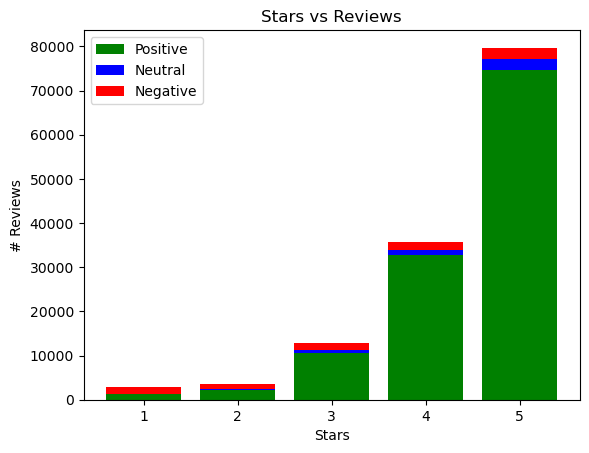

In [30]:
plt.bar(x=sent4.columns, height=sent4.loc['positive'],color='g')
plt.bar(x=sent4.columns, height=sent4.loc['neutral'],bottom=sent4.loc['positive'],color='b')
plt.bar(x=sent4.columns, height=sent4.loc['negative'], bottom=sent4.loc['neutral']+sent4.loc['positive'],color='r')
plt.xlabel("Stars")
plt.ylabel("# Reviews")
plt.legend(['Positive','Neutral','Negative'])
plt.title("Stars vs Reviews")
plt.show()

#### We can conclude that stars are proportional with the sentiment 

### 2- Visualiztion that displays the distribution of visits per season for each cluster individually per home country.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
result_df = pd.read_csv('Reviews_processed_V4.csv')

In [2]:
viz4=result_df[['Home Country ', 'Season', 'Cluster']]
viz4.head(1)

,Home Country,Season,Cluster
0,Mexico,Spring,3


In [3]:
# Now let's define a function that takes in our dataset and a cluster # and returns this cluster's data

def clust_data(dataset, cluster_no):
    clus=dataset[dataset['Cluster']==cluster_no]
    clus_pvt=pd.pivot_table(clus,index='Home Country ',columns='Season',aggfunc=len, fill_value=0)
    clus_pvt['total_visits']=clus_pvt.sum(axis=1)
    clus_pvt.sort_values(by='total_visits', ascending=False, inplace=True)
    # Let's select the highest 20 countries in visits
    clus_pvt=clus_pvt.iloc[:,:4]
    return clus_pvt

In [4]:
def n_visit_clstr(country, clstr_no):
    return np.array(clust_data(viz4, clstr_no).loc[country])

In [5]:
# For each cluster, let's prepare the # visits for all countries per season
seasons=list(result_df['Season'].drop_duplicates())

seasons

['Spring', 'Winter', 'Autumn', 'Summer']

In [6]:
# Let's select the highest 20 countries in visits
viz1=result_df[['Home Country ','Season']]
viz2=pd.pivot_table(viz1,index='Home Country ',columns='Season',aggfunc=len, fill_value=0)
viz2['total_visits']=viz2[['Autumn','Spring','Summer','Winter']].sum(axis=1)
viz2.sort_values(by='total_visits', ascending=False, inplace=True)
viz3=viz2.iloc[:20,:4]
countries = list(viz3.index)
countries

['United Kingdom',
 'United States',
 'Australia',
 'India',
 'Canada',
 'Egypt',
 'Thailand',
 'Singapore',
 'Malaysia',
 'South Africa',
 'United Arab Emirates',
 'Netherlands',
 'Germany',
 'China',
 'New Zealand',
 'Indonesia',
 'France',
 'Spain',
 'Saudi Arabia',
 'Romania']

In [7]:
N_seasons=len(seasons)
N_cntr=len(countries)
nvis1=[]
nvis2=[]
nvis3=[]
nvis4=[]
nvis5=[]
nvis6=[]
[nvis1.append(n_visit_clstr(countries[i],0)) for i in range(len(countries))]
[nvis2.append(n_visit_clstr(countries[i],1)) for i in range(len(countries))];
[nvis3.append(n_visit_clstr(countries[i],2)) for i in range(len(countries))];
[nvis4.append(n_visit_clstr(countries[i],3)) for i in range(len(countries))];
[nvis5.append(n_visit_clstr(countries[i],4)) for i in range(len(countries))];
[nvis6.append(n_visit_clstr(countries[i],5)) for i in range(len(countries))];

Dropdown(description='H Country', index=14, options=('United Kingdom', 'United States', 'Australia', 'India', …

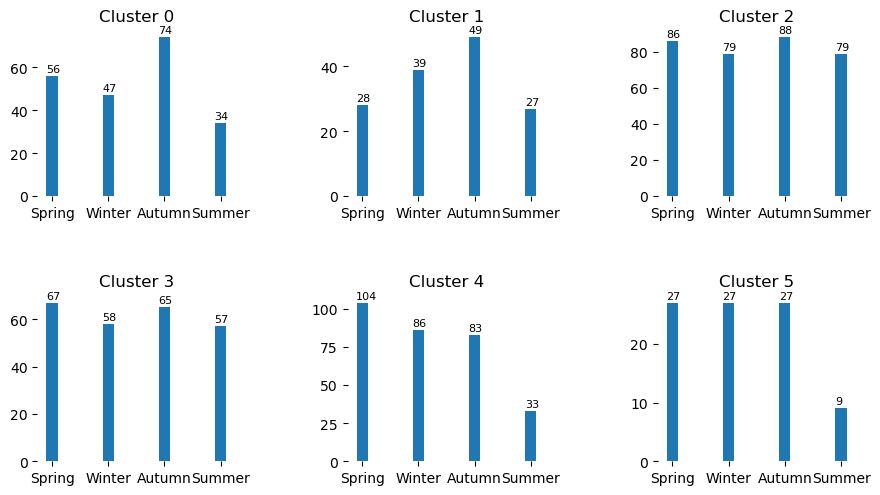

In [8]:
# Let's visualize our data
import ipywidgets as widgets
import numpy as np
from IPython.display import display, clear_output
dropdown=widgets.Dropdown(options=countries,description='H Country')
f, axarr = plt.subplots(2, 3,figsize=(10,6))
f.tight_layout(pad=5.0)

axarr[0, 0].bar(seasons,nvis1[countries.index(dropdown.value)],label=dropdown.value,width=0.2)
axarr[0, 0].set_title('Cluster 0')
axarr[0, 0].set(frame_on=False)
for index, value in enumerate(seasons):
    axarr[0, 0].text(index-0.11,(nvis1[countries.index(dropdown.value)][index])+
             max(nvis1[countries.index(dropdown.value)])/40
             ,nvis1[countries.index(dropdown.value)][index],size=8)    

axarr[0, 1].bar(seasons, nvis2[countries.index(dropdown.value)],label=dropdown.value, width=0.2)
axarr[0, 1].set_title('Cluster 1')
axarr[0, 1].set(frame_on=False)
for index, value in enumerate(seasons):
    axarr[0, 1].text(index-0.11,(nvis2[countries.index(dropdown.value)][index])+
             max(nvis2[countries.index(dropdown.value)])/40
             ,nvis2[countries.index(dropdown.value)][index],size=8)    

axarr[0, 2].bar(seasons, nvis3[countries.index(dropdown.value)],label=dropdown.value, width=0.2)
axarr[0, 2].set_title('Cluster 2')
axarr[0, 2].set(frame_on=False)
for index, value in enumerate(seasons):
    axarr[0, 2].text(index-0.11,(nvis3[countries.index(dropdown.value)][index])+
             max(nvis3[countries.index(dropdown.value)])/40
             ,nvis3[countries.index(dropdown.value)][index],size=8)    

axarr[1, 0].bar(seasons, nvis4[countries.index(dropdown.value)],label=dropdown.value, width=0.2)
axarr[1, 0].set_title('Cluster 3')
axarr[1, 0].set(frame_on=False)
for index, value in enumerate(seasons):
    axarr[1, 0].text(index-0.11,(nvis4[countries.index(dropdown.value)][index])+
             max(nvis4[countries.index(dropdown.value)])/40
             ,nvis4[countries.index(dropdown.value)][index],size=8)    

axarr[1, 1].bar(seasons, nvis5[countries.index(dropdown.value)],label=dropdown.value, width=0.2)
axarr[1, 1].set_title('Cluster 4')
axarr[1, 1].set(frame_on=False)
for index, value in enumerate(seasons):
    axarr[1, 1].text(index-0.11,(nvis5[countries.index(dropdown.value)][index])+
             max(nvis5[countries.index(dropdown.value)])/40
             ,nvis5[countries.index(dropdown.value)][index],size=8)    

axarr[1, 2].bar(seasons, nvis6[countries.index(dropdown.value)],label=dropdown.value, width=0.2)
axarr[1, 2].set_title('Cluster 5')
axarr[1, 2].set(frame_on=False)
for index, value in enumerate(seasons):
    axarr[1, 2].text(index-0.11,(nvis6[countries.index(dropdown.value)][index])+
             max(nvis6[countries.index(dropdown.value)])/40
             ,nvis6[countries.index(dropdown.value)][index],size=8)


def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        display(dropdown)
        f, axarr = plt.subplots(2, 3,figsize=(10,6))
        f.tight_layout(pad=5.0)
        axarr[0, 0].bar(seasons,nvis1[countries.index(dropdown.value)],label=dropdown.value,width=0.2)
        plt.box(False)
        axarr[0, 0].set_title('Cluster 0')
        axarr[0, 0].set(frame_on=False)
        for index, value in enumerate(seasons):
            axarr[0, 0].text(index-0.11,(nvis1[countries.index(dropdown.value)][index])+
                     max(nvis1[countries.index(dropdown.value)])/40
                     ,nvis1[countries.index(dropdown.value)][index],size=8)
    
        axarr[0, 1].bar(seasons, nvis2[countries.index(dropdown.value)],label=dropdown.value, width=0.2)
        axarr[0, 1].set_title('Cluster 1')
        axarr[0, 1].set(frame_on=False)
        for index, value in enumerate(seasons):
            axarr[0, 1].text(index-0.11,(nvis2[countries.index(dropdown.value)][index])+
                     max(nvis2[countries.index(dropdown.value)])/40
                     ,nvis2[countries.index(dropdown.value)][index],size=8)    

        axarr[0, 2].bar(seasons, nvis3[countries.index(dropdown.value)],label=dropdown.value, width=0.2)
        axarr[0, 2].set_title('Cluster 2')
        axarr[0, 2].set(frame_on=False)
        for index, value in enumerate(seasons):
            axarr[0, 2].text(index-0.11,(nvis3[countries.index(dropdown.value)][index])+
                     max(nvis3[countries.index(dropdown.value)])/40
                     ,nvis3[countries.index(dropdown.value)][index],size=8)    

        axarr[1, 0].bar(seasons, nvis4[countries.index(dropdown.value)],label=dropdown.value, width=0.2)
        axarr[1, 0].set_title('Cluster 3')
        axarr[1, 0].set(frame_on=False)
        for index, value in enumerate(seasons):
            axarr[1, 0].text(index-0.11,(nvis4[countries.index(dropdown.value)][index])+
                     max(nvis4[countries.index(dropdown.value)])/40
                     ,nvis4[countries.index(dropdown.value)][index],size=8)    

        axarr[1, 1].bar(seasons, nvis5[countries.index(dropdown.value)],label=dropdown.value, width=0.2)
        axarr[1, 1].set_title('Cluster 4')
        axarr[1, 1].set(frame_on=False)
        for index, value in enumerate(seasons):
            axarr[1, 1].text(index-0.11,(nvis5[countries.index(dropdown.value)][index])+
                     max(nvis5[countries.index(dropdown.value)])/40
                     ,nvis5[countries.index(dropdown.value)][index],size=8)    

        axarr[1, 2].bar(seasons, nvis6[countries.index(dropdown.value)],label=dropdown.value, width=0.2)
        axarr[1, 2].set_title('Cluster 5')
        axarr[1, 2].set(frame_on=False)
        for index, value in enumerate(seasons):
            axarr[1, 2].text(index-0.11,(nvis6[countries.index(dropdown.value)][index])+
                     max(nvis6[countries.index(dropdown.value)])/40
                     ,nvis6[countries.index(dropdown.value)][index],size=8)
f.suptitle('# Visits per Season for all Clusters', fontsize=16)
dropdown.observe(on_change)

display(dropdown)


### 3- Visualiztion that displays the distribution of visits per place for each cluster individually per home country.

In [9]:
import plotly.graph_objects as go
import plotly.express as px
from ipywidgets import interact, widgets
import pandas as pd
from plotly.subplots import make_subplots

# Load the data
df = pd.read_csv('Reviews_processed_V4.csv')
df = df.rename(columns={'Home Country ': 'Home Country'})

# Create a dropdown for Cluster selection
cluster_dropdown = widgets.Dropdown(
    options=df['Cluster'].unique(),
    description='Cluster:',
    disabled=False,
)

# Create a dropdown for Place selection (initially empty)
place_dropdown = widgets.Dropdown(
    description='Place:',
    disabled=False,
)

# Function to update the Place dropdown based on Cluster
def update_place_dropdown(change):
    cluster = change['new'] if 'new' in change else cluster_dropdown.value
    filtered_df = df[df['Cluster'] == cluster]
    place_options = filtered_df['Tourist place'].unique()
    place_dropdown.options = place_options

# Watch for changes on the Cluster dropdown and update the Place dropdown
cluster_dropdown.observe(update_place_dropdown, names='value')

# Function to visualize both the Sankey diagram and the world map
def plot_charts(cluster, place):
    filtered_df = df[(df['Cluster'] == cluster) & (df['Tourist place'] == place)]
    
    # Create source, target, value for Sankey
    top_countries = filtered_df['Home Country'].value_counts().head(10).index
    sankey_df = filtered_df[filtered_df['Home Country'].isin(top_countries)]
    source = sankey_df['Home Country'].astype('category').cat.codes
    target = sankey_df['Tourist place'].astype('category').cat.codes + len(sankey_df['Home Country'].astype('category').cat.categories)
    value = [1] * len(source)
    
    # Create the Sankey diagram
    sankey_fig = go.Figure(go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=list(sankey_df['Home Country'].astype('category').cat.categories) + list(sankey_df['Tourist place'].astype('category').cat.categories)
        ),
        link=dict(source=source, target=target, value=value)
    ))
    sankey_fig.show()
    
    # Aggregate data by Home Country for the map
    aggregated_df = filtered_df.groupby('Home Country').size().reset_index(name='count')
    
    # Create the choropleth map
    map_fig = px.choropleth(aggregated_df, 
                            locations="Home Country",
                            locationmode='country names',
                            color="count",
                            hover_name="Home Country",
                            color_continuous_scale=px.colors.sequential.Plasma)
    map_fig.show()

# Populate the place dropdown with initial values based on the default cluster
update_place_dropdown({})

# Link the widgets and the function together
interact(plot_charts, cluster=cluster_dropdown, place=place_dropdown)

interactive(children=(Dropdown(description='Cluster:', options=(3, 4, 5, 0, 2, 1), value=3), Dropdown(descript…

<function __main__.plot_charts(cluster, place)>